In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Get column names for feature importance analysis
input_data = pd.read_csv("../Data/exoplanet_data.csv").iloc[:,1:]
feature_names = input_data.columns

In [3]:
# Load data
npz = np.load("../Data/Kepler_data_train.npz",allow_pickle=True)

x_train = npz['inputs']
y_train = npz['targets']

npz = np.load("../Data/Kepler_data_test.npz",allow_pickle=True)
x_test = npz['inputs']
y_test = npz['targets']

In [4]:
feature_names = pd.DataFrame(x_train)

# Decision Tree Classifier

In [5]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)
tree_classifier.score(x_test, y_test)

0.86441647597254

In [6]:
## Feature importance of descision tree classifier
sorted(zip(tree_classifier.feature_importances_, feature_names), reverse=True)

[(0.18564493680744748, 2),
 (0.18519729598226264, 0),
 (0.17812389782183546, 1),
 (0.15188153215713998, 12),
 (0.03984566202181231, 6),
 (0.030395049458732334, 3),
 (0.028732419442947355, 9),
 (0.027105835152145548, 18),
 (0.025568637495259377, 17),
 (0.020703076853202298, 4),
 (0.019441353515246635, 7),
 (0.01769166009482292, 5),
 (0.016134355531128724, 19),
 (0.015312357374969492, 8),
 (0.014245112099441303, 14),
 (0.013010109729914959, 16),
 (0.010702200743292454, 15),
 (0.010420522375290332, 11),
 (0.005331461660461918, 10),
 (0.004512523682646187, 13)]

In [7]:
y_pred = tree_classifier.predict(x_test)

In [8]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.73      0.78      0.75       415
FALSE POSITIVE       0.77      0.72      0.74       449
     CANDIDATE       0.98      0.97      0.98       884

      accuracy                           0.86      1748
     macro avg       0.83      0.83      0.83      1748
  weighted avg       0.87      0.86      0.86      1748



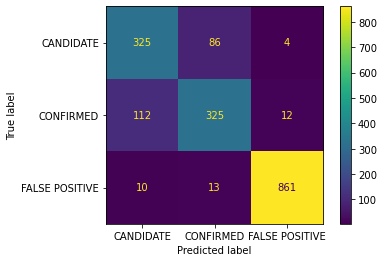

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_classifier, x_test, y_test)

# Random Forest Classifier

In [10]:
forest_classifer = RandomForestClassifier(n_estimators=200)
forest_classifer = forest_classifer.fit(x_train, y_train)
forest_classifer.score(x_test, y_test)

0.8935926773455377

In [49]:
## Feature importance of random forest classifier
sorted(zip(forest_classifer.feature_importances_, feature_names), reverse=True)

[(0.11423974589322476, 2),
 (0.10001173014528054, 0),
 (0.07292687517180903, 1),
 (0.060266305595341435, 26),
 (0.053401514471152316, 19),
 (0.036565959571334065, 14),
 (0.031814718059854655, 21),
 (0.03176814704847605, 3),
 (0.030882845674259463, 20),
 (0.028951160285211976, 30),
 (0.02883730656246583, 15),
 (0.026314567271800232, 29),
 (0.02239388913573683, 9),
 (0.021905676032875913, 8),
 (0.021675387839642478, 16),
 (0.021227794564274417, 4),
 (0.021170794472226598, 13),
 (0.019834150928331205, 10),
 (0.018362811630946746, 24),
 (0.0178325626513295, 6),
 (0.01563948026005604, 5),
 (0.015338489770022074, 25),
 (0.014237396909685073, 18),
 (0.013572188620062842, 22),
 (0.013387105247598492, 23),
 (0.013020893819544108, 37),
 (0.012230847177620064, 7),
 (0.012005635521346028, 17),
 (0.011163702164419802, 35),
 (0.010942335496836786, 38),
 (0.010544101122022722, 12),
 (0.010457570609444987, 11),
 (0.010258196502455439, 39),
 (0.009895110044366502, 33),
 (0.009604750082670078, 28),
 (0.

In [50]:
y_pred = forest_classifer.predict(x_test)

In [51]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.81      0.78      0.80       399
FALSE POSITIVE       0.82      0.81      0.82       448
     CANDIDATE       0.98      1.00      0.99       901

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



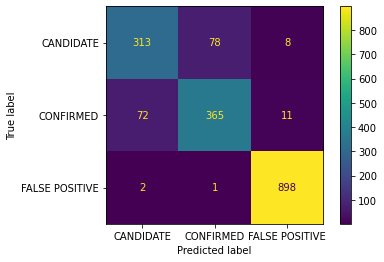

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest_classifer, x_test, y_test)